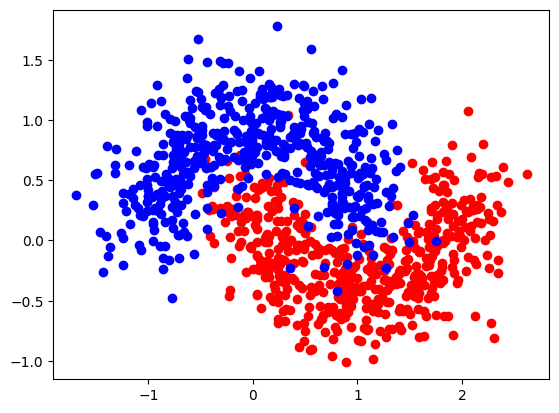

train score : 0.87
test score : 0.89


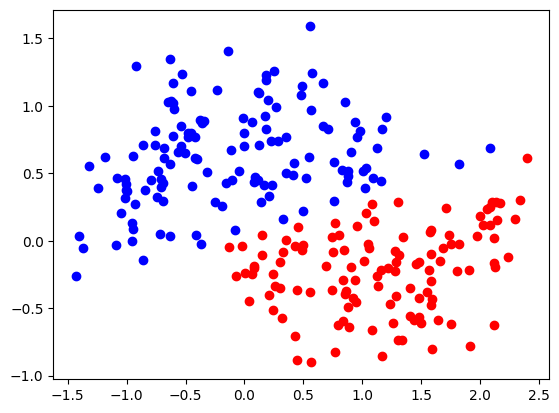

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

x, y = make_moons(n_samples=1000, noise=0.25, random_state=3)

plt.plot(x[y==1,0],x[y==1,1],marker='o',linestyle='',color='red')
plt.plot(x[y==0,0],x[y==0,1],marker='o',linestyle='',color='blue')
plt.show()


#트레인셋 테스트셋 분리
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, random_state=42, test_size=0.25)

#객체 생성
mlp = MLPClassifier(hidden_layer_sizes=(5,),solver='lbfgs')   #options : 'lbfgs','sgd','adam'
#모델 훈련
mlp.fit(x_train,y_train)
#정확도 확인
score_train=mlp.score(x_train,y_train)
print("train score : %0.2f" %score_train)

#테스트셋을 이용한 평가
score_test=mlp.score(x_test,y_test)
print("test score : %0.2f" %score_test)

#테스트셋을 이용한 결과 시각화

y_result=mlp.predict(x_test) #테스트 데이터 라벨값
plt.plot(x_test[y_result==1,0],x_test[y_result==1,1],marker='o',linestyle='',color='red')
plt.plot(x_test[y_result==0,0],x_test[y_result==0,1],marker='o',linestyle='',color='blue')
plt.show()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

lbc = load_breast_cancer
X, y = lbc.data, lbc.target

rf = RandomForestClassifier(random_state=1)
score_list = cross_val_score(rf, X, y)

result = list(map(lambda x: '{score:.2f}'.format(score=x), score_list))
print(result)

AttributeError: 'function' object has no attribute 'data'

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

lbc = load_breast_cancer()  # 함수를 호출하여 데이터 로드
X, y = lbc.data, lbc.target

rf = RandomForestClassifier(random_state=1)
score_list = cross_val_score(rf, X, y)

result = list(map(lambda x: '{score:.2f}'.format(score=x), score_list))
print(result)

['0.93', '0.95', '0.98', '0.97', '0.96']


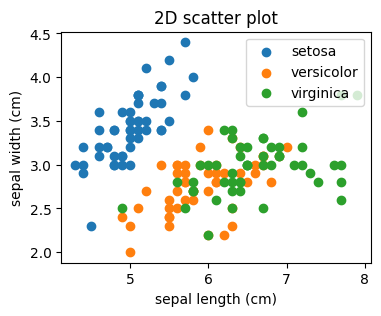

In [8]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 주요 특성 선택 (예: 꽃잎의 길이와 너비)
feature1_index = 0
feature2_index = 1

# 시각화
plt.figure(figsize=(4, 3))
for target_class in set(y):
    # 각 클래스에 해당하는 샘플 추출
    X_class = X[y == target_class]
    # 해당 클래스의 데이터를 scatter plot으로 표시
    plt.scatter(X_class[:, feature1_index], X_class[:, feature2_index], label=iris.target_names[target_class])

plt.xlabel(iris.feature_names[feature1_index])
plt.ylabel(iris.feature_names[feature2_index])
plt.title("2D scatter plot")
plt.legend()
plt.show()


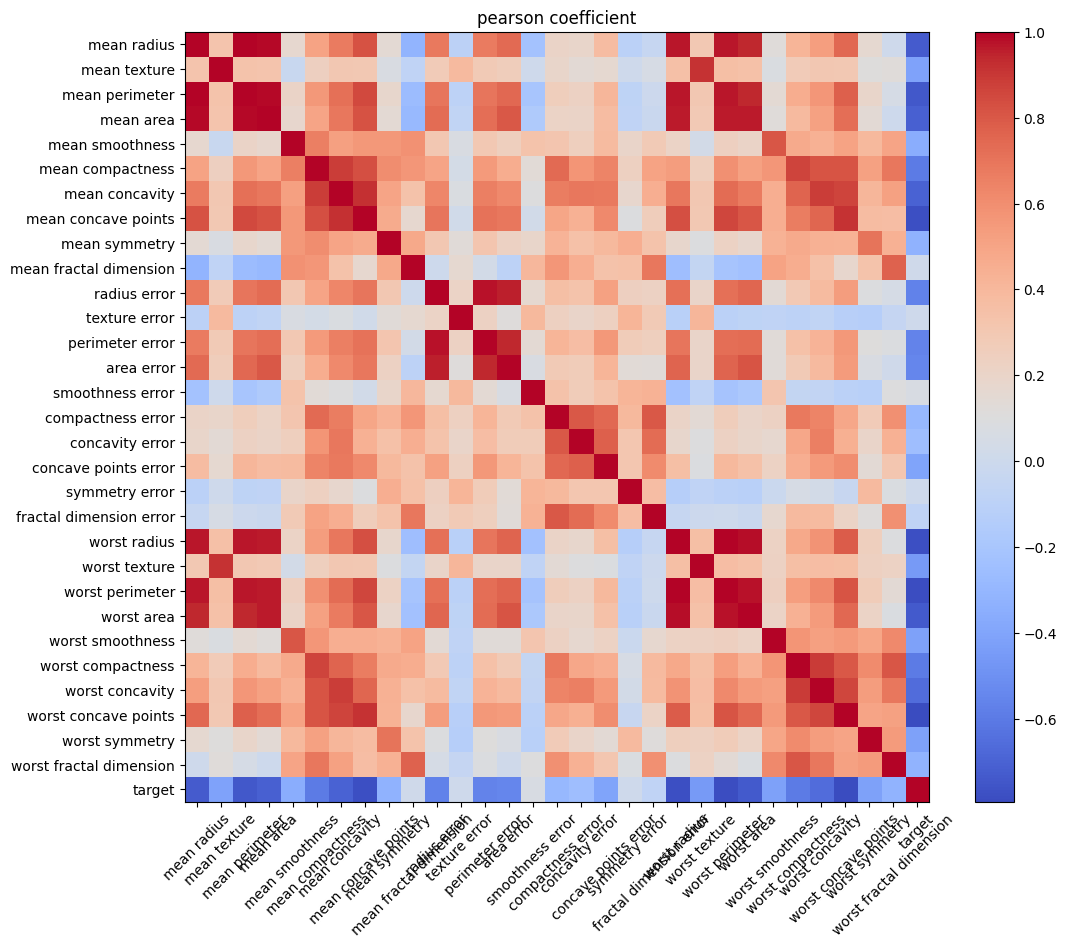

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# 유방암 데이터 로드
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 데이터프레임에 종양 유형 열 추가 (0: 양성, 1: 악성)
X['target'] = y

# 피어슨 상관관계 계산
correlation_matrix = X.corr()

# 그래프 그리기
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('pearson coefficient')
plt.show()


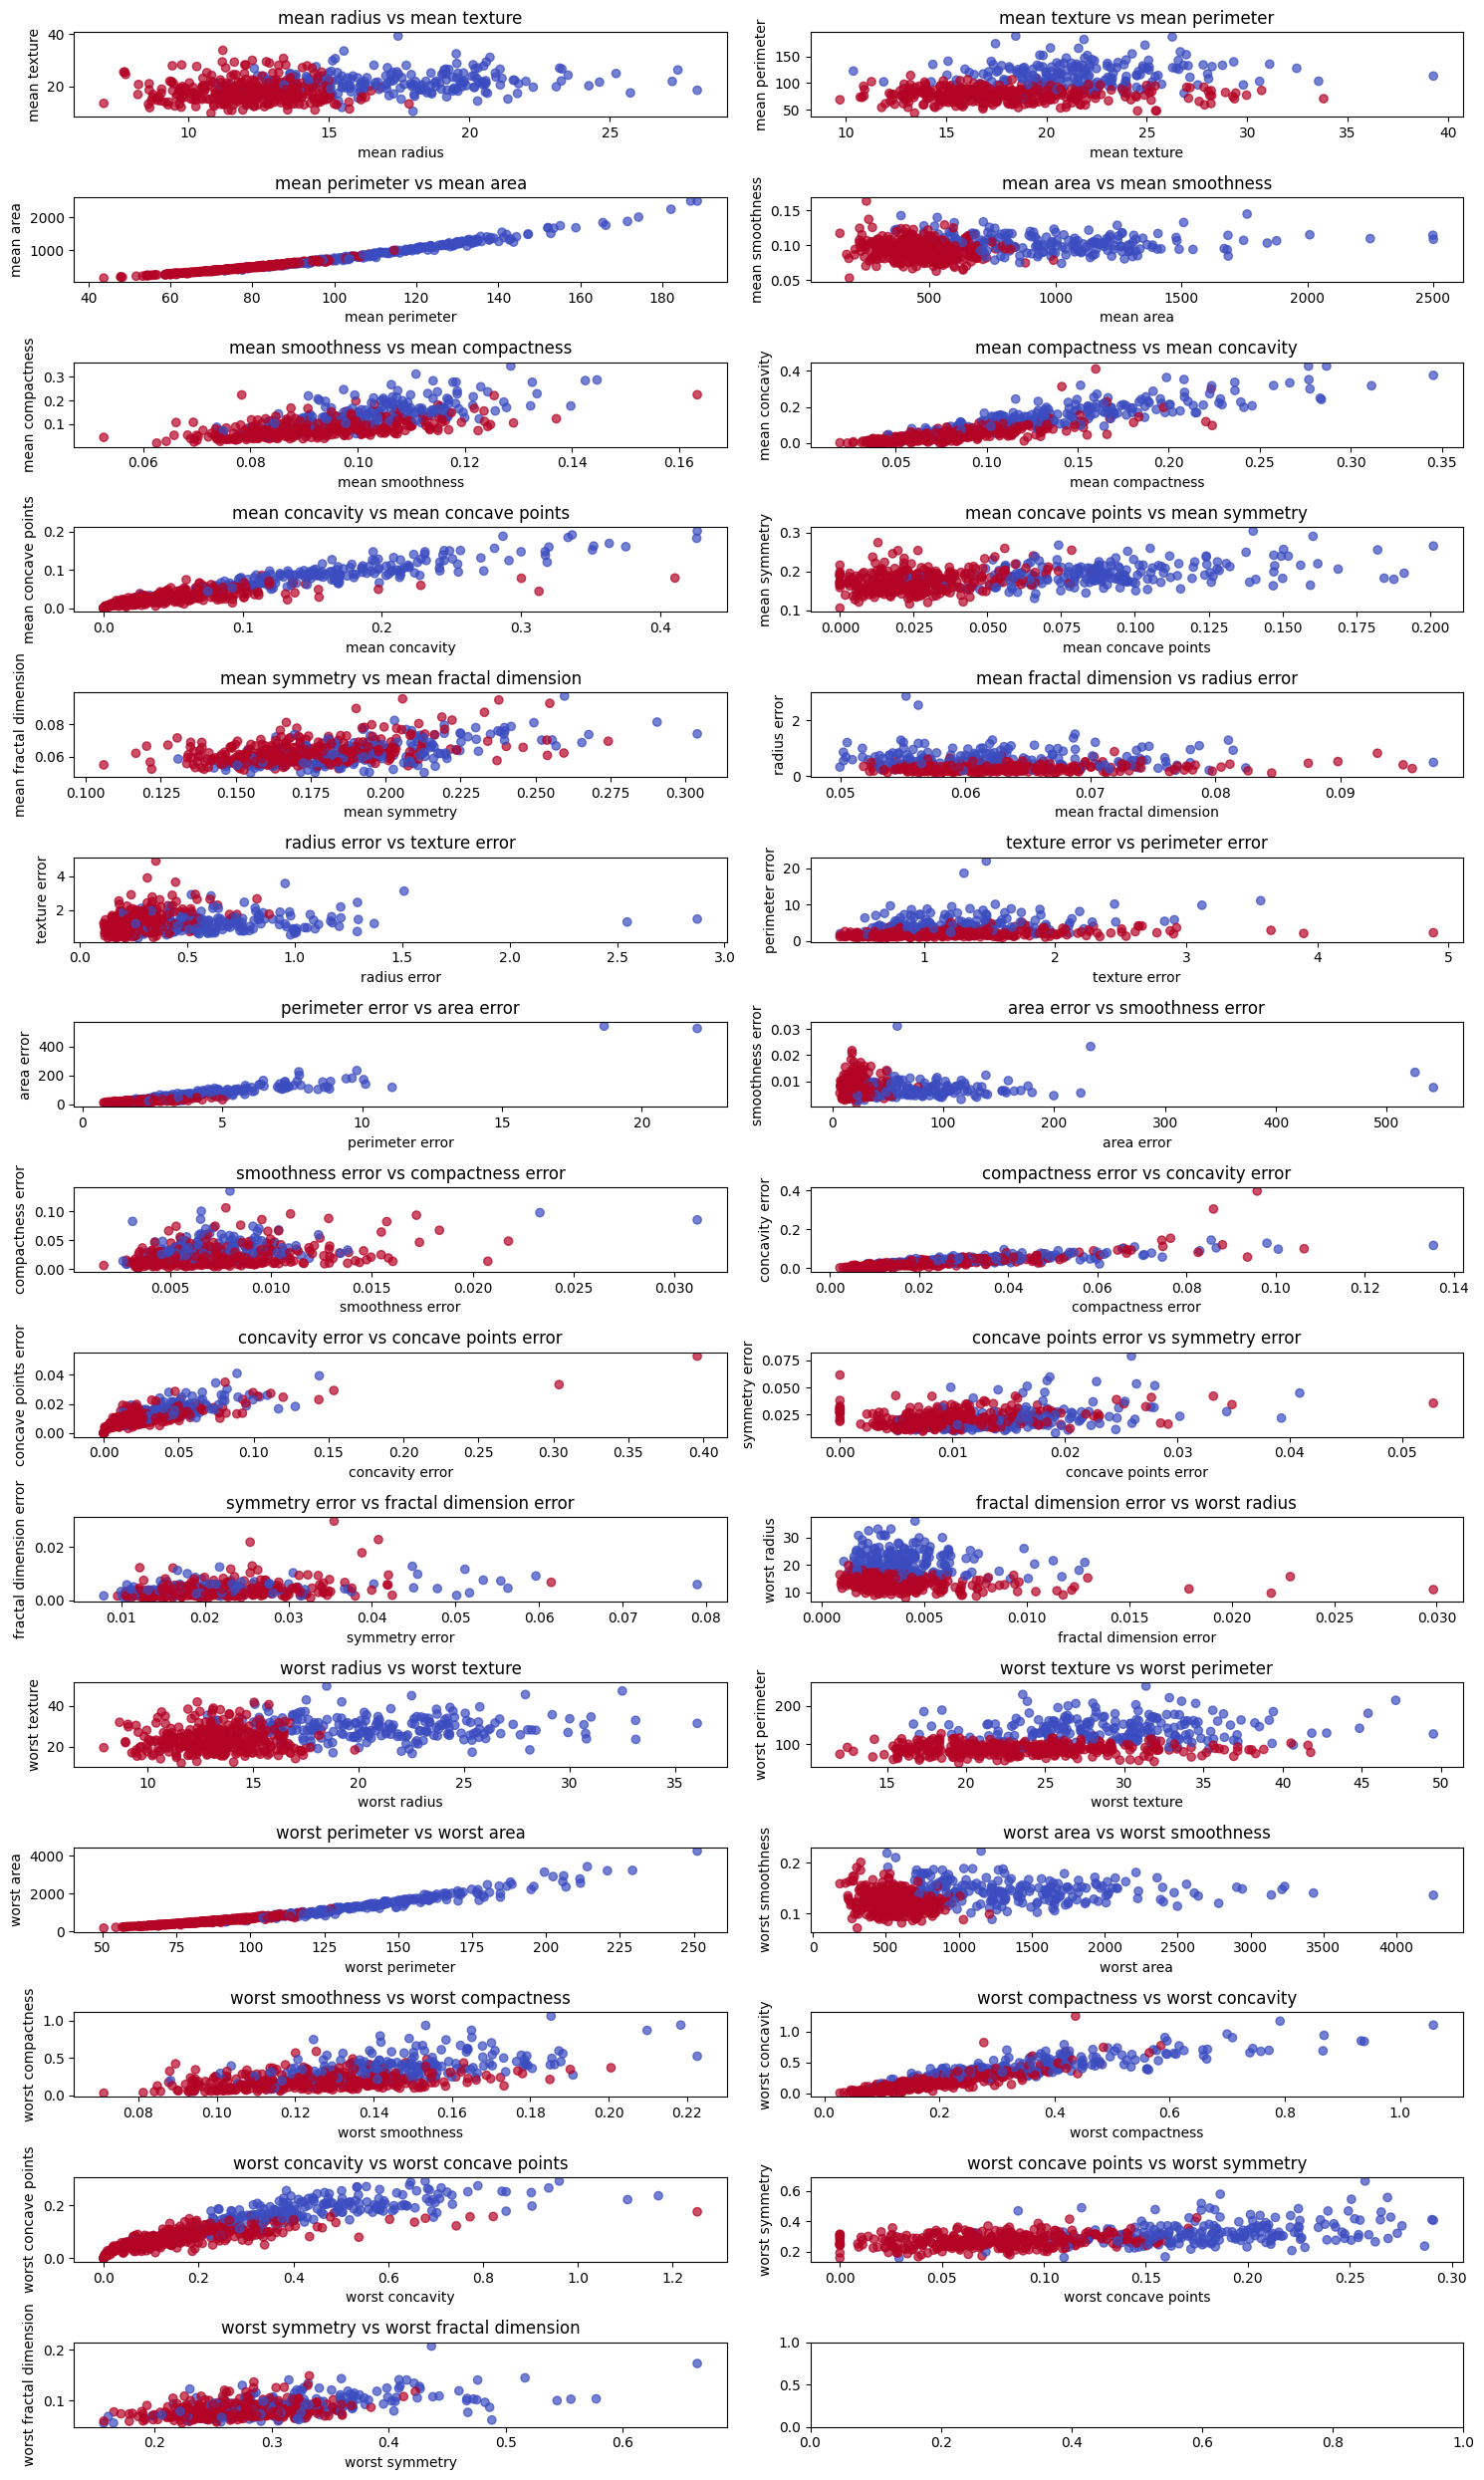

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# 유방암 데이터 로드
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 데이터프레임에 종양 유형 열 추가 (0: 양성, 1: 악성)
X['target'] = y

# 상관관계 계산
correlation_matrix = X.corr()

# 특성을 두 개씩 묶어서 그래프 출력
features = correlation_matrix.columns[:-1]  # target 열 제외
n_features = len(features)
fig, axes = plt.subplots(n_features // 2, 2, figsize=(15, 25))

for i, (feature1, feature2) in enumerate(zip(features[:-1], features[1:])):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(X[feature1], X[feature2], c=y, cmap='coolwarm', alpha=0.7)
    axes[row, col].set_xlabel(feature1)
    axes[row, col].set_ylabel(feature2)
    axes[row, col].set_title(f'{feature1} vs {feature2}')

plt.tight_layout()
plt.show()


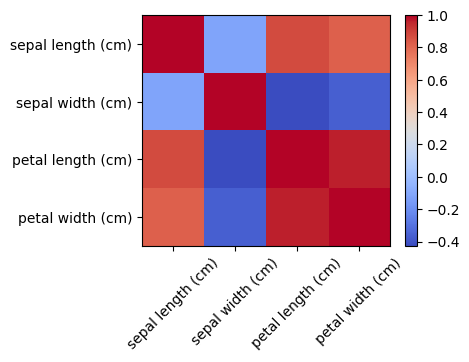

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# iris 데이터 로드
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 상관관계 계산
correlation_matrix = X.corr()

# 상관관계 그래프 출력
plt.figure(figsize=(4, 3))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# iris 데이터 로드
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 데이터프레임에 종속 변수 추가
X['species'] = y.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# iris 데이터와 상관관계 계산
corr = X.corr(method='pearson')

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cbar=True, annot=True, annot_kws={'size': 10}, fmt='.2f', square=True, cmap='Blues')
plt.title('Iris 데이터의 피어슨 상관관계 히트맵')
plt.show()


ValueError: could not convert string to float: 'setosa'

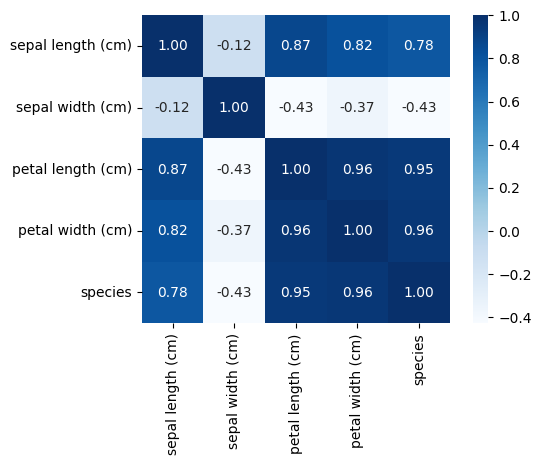

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# iris 데이터 로드
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 데이터프레임에 종속 변수 추가
X['species'] = y

# iris 데이터와 상관관계 계산
corr = X.corr(method='pearson')

# 히트맵 그리기
plt.figure(figsize=(6, 4))
sns.heatmap(corr, cbar=True, annot=True, annot_kws={'size': 10}, fmt='.2f', square=True, cmap='Blues')
plt.show()


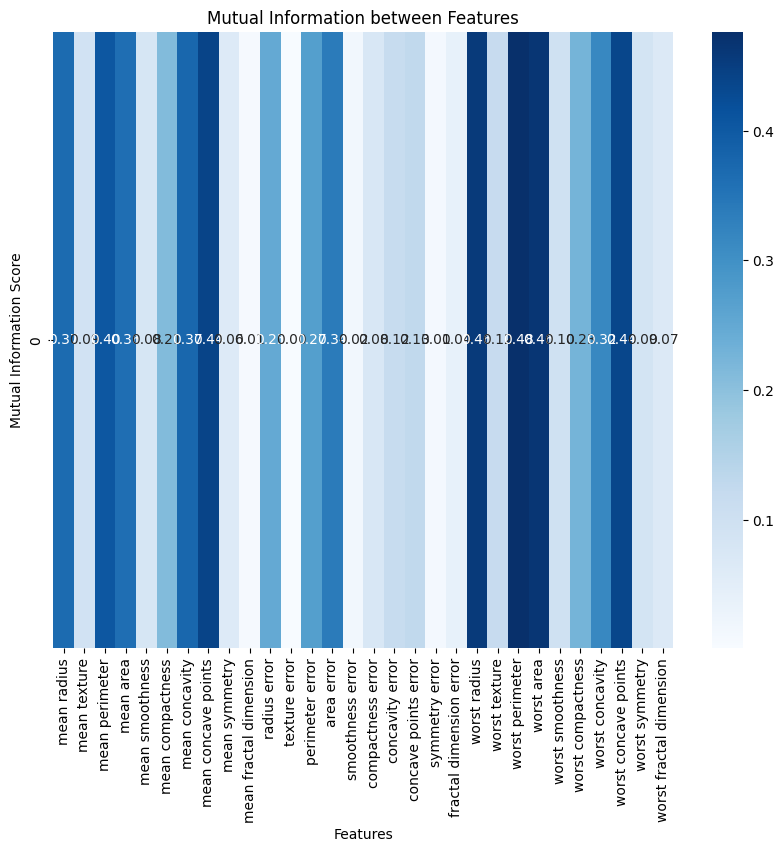

In [23]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

# 유방암 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target
headers = data.feature_names

# 상호정보량 계산
mi_scores = mutual_info_classif(X, y)

# MIC와 유사한 그래프 출력
plt.figure(figsize=(10, 8))
sns.heatmap(mi_scores.reshape(1, -1), annot=True, fmt=".2f", cmap='Blues', xticklabels=headers)
plt.title('Mutual Information between Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.show()


C:\Users\pione\AppData\Local\Temp\ipykernel_22180\2389489007.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['Mutual Information Score'], palette="viridis")


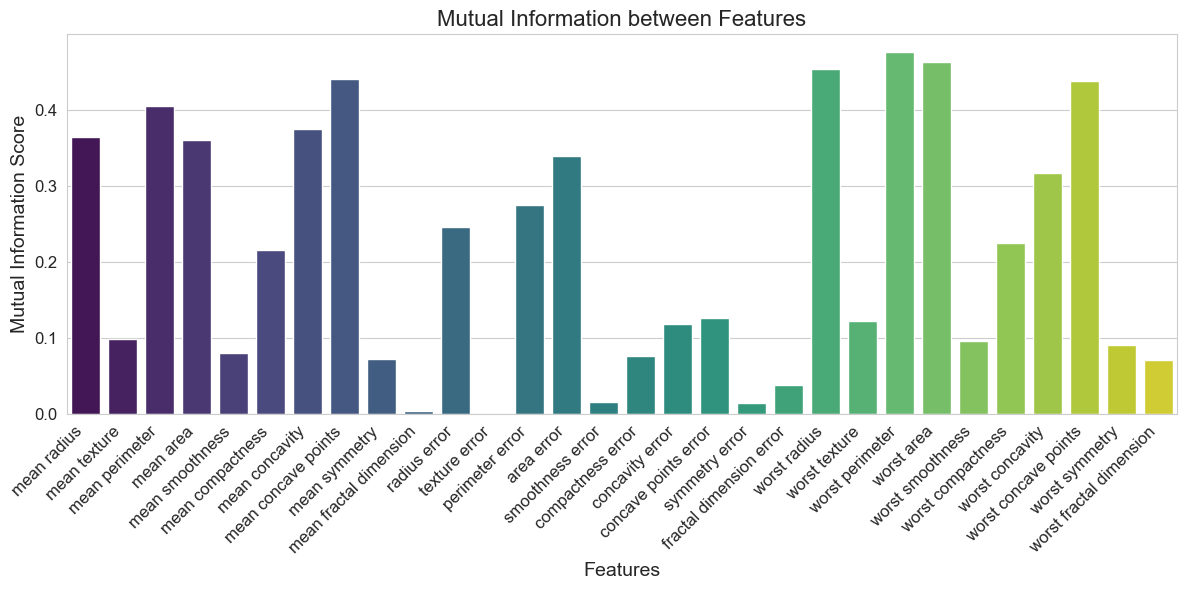

In [25]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

# 유방암 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target
headers = data.feature_names

# 상호정보량 계산
mi_scores = mutual_info_classif(X, y)

# 상호정보량을 데이터프레임으로 변환
df = pd.DataFrame(mi_scores, index=headers, columns=['Mutual Information Score'])

# 그래프 스타일 설정
sns.set_style("whitegrid")

# 그래프 생성
plt.figure(figsize=(12, 6))
sns.barplot(x=df.index, y=df['Mutual Information Score'], palette="viridis")
plt.title('Mutual Information between Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mutual Information Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\pione\AppData\Local\Temp\ipykernel_22180\3430565872.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Mutual Information Score', data=df_sorted, palette="viridis")


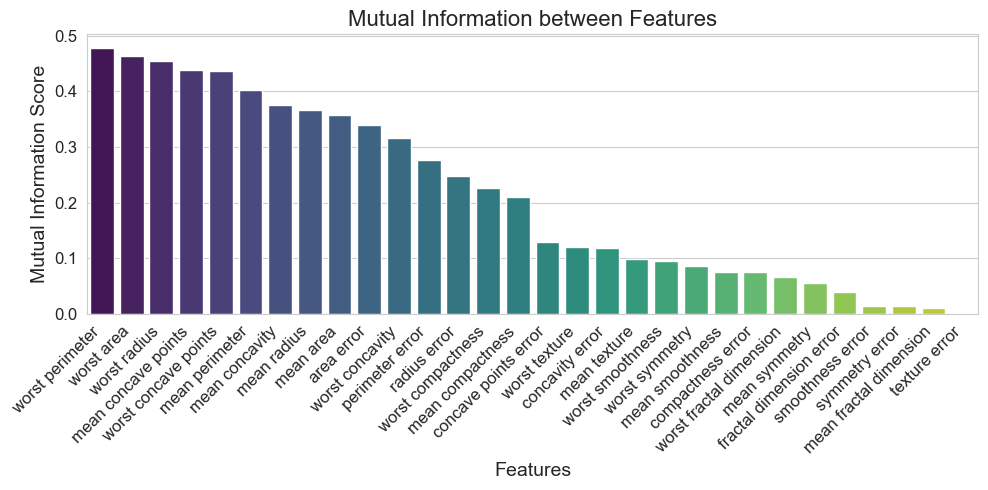

In [27]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 유방암 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target
headers = data.feature_names

# 상호정보량 계산
mi_scores = mutual_info_classif(X, y)

# 상호정보량을 데이터프레임으로 변환
df = pd.DataFrame({'Feature': headers, 'Mutual Information Score': mi_scores})

# 상호정보량 점수를 기준으로 특성을 정렬
df_sorted = df.sort_values(by='Mutual Information Score', ascending=False)

# 그래프 스타일 설정
sns.set_style("whitegrid")

# 그래프 생성
plt.figure(figsize=(10, 5))
sns.barplot(x='Feature', y='Mutual Information Score', data=df_sorted, palette="viridis")
plt.title('Mutual Information between Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mutual Information Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
